# Test LZW (comp/decomp)

In [1]:
from PIL import Image
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

ABSOLUTE_PATH = os.getcwd()

Basic Functions of compression and decompression based on the LZW algorithm

### Compression 
The compresion function of LWZ

In [2]:
def compress(input):
    DICTIONARY_SIZE = 256
    dictionary = {}
    result = []
    temp = ""

    # initialiser la table ascii encoder => fiha 256 
    for i in range(0, DICTIONARY_SIZE):
        dictionary[str(chr(i))] = i

    for c in input:
        temp2 = temp+str(chr(c))
        if temp2 in dictionary.keys():
            temp = temp2
        else:
            result.append(dictionary[temp])
            dictionary[temp2] = DICTIONARY_SIZE
            DICTIONARY_SIZE+=1

            # vider temp pour ne laisser que le dernier car
            temp = ""+str(chr(c))

    if temp != "":
        result.append(dictionary[temp])  
        
    return result

### Décompression
The decompresion function of LWZ

In [3]:
def decompress(input):
    DICTIONARY_SIZE = 256
    dictionary = {}
    result = []
    # initialiser la table ascii decoder => fiha 256 
    for i in range(0, DICTIONARY_SIZE):
        dictionary[i] = str(chr(i))

    previous = chr(input[0])
    input = input[1:]
    result.append(previous)

    for bit in input:
        aux = ""
        if bit in dictionary.keys():
            aux = dictionary[bit]
        else:
            aux = previous+previous[0] 
            
        result.append(aux)
        dictionary[DICTIONARY_SIZE] = previous + aux[0]
        DICTIONARY_SIZE+= 1
        previous = aux
    return result

## Text
testing compression and decompresion on text

In [4]:
# open text file
text = open(ABSOLUTE_PATH+"//text.txt", "rb").read()
# compress text
compressedFile = compress(text)
print(compressedFile)

[84, 104, 101, 32, 113, 117, 105, 99, 107, 32, 98, 114, 111, 119, 110, 32, 102, 111, 120, 32, 106, 117, 109, 112, 115, 32, 111, 118, 101, 114, 32, 116, 257, 32, 108, 97, 122, 121, 32, 100, 111, 103, 32, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 288, 301, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 258, 316, 293, 295, 297, 299, 259, 261, 323, 304, 326, 307, 329, 310, 332, 313, 335, 289, 291, 338, 319, 341, 322, 303, 325, 306, 328, 309, 331, 312, 334, 315, 354, 318, 340, 321, 343, 359, 305, 327, 308, 330, 311, 333, 314, 336, 368, 339, 320, 300, 372, 324, 374, 347, 363, 378, 351, 367, 317, 383, 357, 386, 345, 361, 376, 349, 365, 380, 353, 394, 356, 371, 302, 387, 346, 362, 377, 350, 366, 381, 405, 370, 385, 408, 398, 375, 348, 364, 379, 352, 337, 369, 384, 342, 419, 360, 421, 390, 413, 403, 426, 395, 407, 344, 431, 389, 412, 402, 425, 382, 406, 418, 439, 388, 411, 401, 424, 393, 355, 417, 429, 448, 41

In [5]:
# Decompress text
decompressedFile = decompress(compressedFile)
print("".join(decompressedFile))

The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over the lazy dog The quick brown fox jumps over t

## Image
Testing functionalities on images

### open image and show it

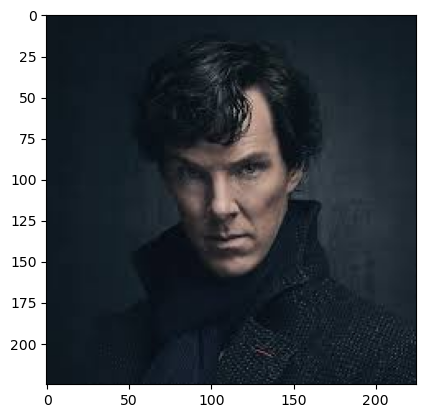

In [6]:
# open an image
image = Image.open("sherlock.jfif")
# image = Image.open("manga.png")
plt.imshow(image.convert('RGB'))
plt.show()

### Compress an Image
adding the steps needed to convert an image by keeping some details like width , height and mode (RGB or Grey scale) 

In [7]:
def compressImage(image):
    input = np.array(image)
    w,h = image.size
    mode = image.mode    
    compressedImage = [h,w,1 if mode =='L' else 3]
    compressedImage.extend(compress(input.flatten()))
    return compressedImage

testing image compression

In [8]:
ci=compressImage(image)
ci

Saving compressed data in a binary

In [9]:
# save
output = open(ABSOLUTE_PATH+"//output.bin", "wb")
pickle.dump(ci, output)


Reloading compressed data from file

In [22]:
# load
li = pickle.load(open(ABSOLUTE_PATH+"//output.bin", "rb"))
li

[225,
 225,
 3,
 14,
 23,
 30,
 256,
 258,
 257,
 259,
 262,
 261,
 264,
 30,
 13,
 22,
 29,
 267,
 269,
 268,
 270,
 273,
 272,
 275,
 29,
 263,
 260,
 279,
 278,
 281,
 265,
 282,
 280,
 283,
 24,
 33,
 14,
 287,
 289,
 288,
 290,
 293,
 292,
 295,
 13,
 23,
 32,
 297,
 299,
 298,
 300,
 303,
 302,
 305,
 301,
 307,
 291,
 309,
 287,
 15,
 25,
 34,
 312,
 314,
 313,
 315,
 318,
 317,
 320,
 316,
 322,
 315,
 17,
 27,
 36,
 325,
 327,
 326,
 328,
 331,
 330,
 333,
 329,
 335,
 332,
 336,
 334,
 328,
 18,
 28,
 37,
 341,
 343,
 342,
 344,
 347,
 346,
 349,
 345,
 351,
 348,
 352,
 350,
 353,
 356,
 355,
 358,
 37,
 20,
 30,
 39,
 361,
 363,
 362,
 364,
 367,
 366,
 369,
 39,
 19,
 29,
 38,
 372,
 374,
 373,
 375,
 378,
 377,
 380,
 376,
 382,
 379,
 383,
 381,
 378,
 32,
 40,
 19,
 388,
 390,
 389,
 391,
 394,
 393,
 396,
 18,
 31,
 39,
 398,
 400,
 399,
 401,
 404,
 403,
 406,
 371,
 395,
 392,
 410,
 409,
 395,
 405,
 402,
 415,
 414,
 417,
 407,
 418,
 416,
 419,
 422,
 421,
 424,
 

### Decompress an Image
adding the steps needed to decompress an image by retrieving the details like width , height ,mode (RGB or Grey scale) the data of the image  and reshape it based on them

In [11]:
def decompressImage(input):
    h=input.pop(0)
    w=input.pop(0)
    mode=input.pop(0)
    if mode== 1:
        s=tuple([h,w])
    else :
        s=tuple([h,w,mode])
    decompressed="".join(decompress(input))
    image = np.array([ord(x) for x in decompressed])
    return image.reshape(s)

testing decompression

In [23]:
result = decompressImage(li)
result

array([[[14, 23, 30],
        [14, 23, 30],
        [14, 23, 30],
        ...,
        [15, 25, 34],
        [15, 25, 34],
        [14, 24, 33]],

       [[14, 23, 30],
        [14, 23, 30],
        [14, 23, 30],
        ...,
        [15, 25, 34],
        [15, 25, 34],
        [14, 24, 33]],

       [[14, 23, 30],
        [14, 23, 30],
        [14, 23, 30],
        ...,
        [16, 26, 35],
        [16, 26, 35],
        [15, 25, 34]],

       ...,

       [[14, 23, 30],
        [14, 23, 30],
        [14, 23, 30],
        ...,
        [25, 35, 44],
        [28, 38, 47],
        [62, 72, 81]],

       [[14, 23, 30],
        [14, 23, 30],
        [14, 23, 30],
        ...,
        [ 7, 17, 26],
        [ 9, 19, 28],
        [15, 25, 34]],

       [[14, 23, 30],
        [14, 23, 30],
        [14, 23, 30],
        ...,
        [25, 35, 44],
        [14, 24, 33],
        [20, 30, 40]]])

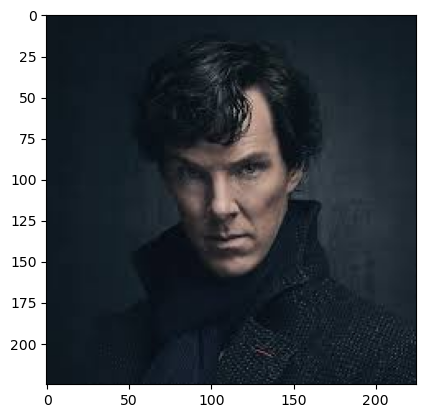

In [26]:
plt.imshow(Image.fromarray(np.uint8(result)))
plt.show()